# 12-Numpy和Pandas的介绍和使用🐿️

## Numpy🐍

In [2]:
# 安装numpy模块
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


### 为什么需要Numpy❓

- 运行速度
- 方便使用

In [3]:
# 导入numpy
import numpy as np
np.random.seed(12345)

In [4]:
# 长度100万的numpy格式的数组
my_arr = np.arange(1_000_000) 

# 长度100万的list
my_list = list(range(1_000_000))

计算数组中一百万个数的平方，使用`timeit`测试两种方法的运行时间

In [5]:
print('numpy running time:')
%timeit my_arr2 = my_arr ** 2

print('python list running time:')
%timeit my_list2 = [x ** 2 for x in my_list]

numpy running time:
1.83 ms ± 113 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
python list running time:
265 ms ± 2.56 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


上面的运算都是使用CPU进行计算，调用pytorch，使用gpu进行同样的计算

In [6]:
# assuming there is a CUDA-compatible GPU available
import torch 
my_arr = torch.arange(1_000_000).cuda()

In [7]:
%timeit my_arr2 = my_arr ** 2

The slowest run took 5.13 times longer than the fastest. This could mean that an intermediate result is being cached.
16.8 µs ± 13.9 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Numpy ndarray

numpy只有一种数据类型，ndarray，它是一个多维数组，每个元素都是相同类型的。

![ndarray](./img/2023-10-27-11-02-03.png)

In [8]:
import numpy as np

data = np.array([1, 2, 3])
data

array([1, 2, 3])

In [9]:
# ndarray的数据类型,数组只能包含相同类型的数据
data.dtype

dtype('int32')

### 创建ndarray

![create ndarray](./img/2023-10-27-11-06-02.png)

In [10]:
np.ones(3)

array([1., 1., 1.])

In [11]:
np.zeros(3)

array([0., 0., 0.])

In [12]:
np.random.random(3)

array([0.92961609, 0.31637555, 0.18391881])

In [13]:
# 类似Python中的range函数
np.arange(3)

array([0, 1, 2])

### 算术运算

![加法运算](./img/2023-10-27-11-16-15.png)

In [14]:
data = np.array([1, 2])
ones = np.array([1, 1])
data + ones

array([2, 3])

![其他运算](./img/2023-10-27-11-18-34.png)

In [15]:
data - ones

array([0, 1])

In [16]:
data * data

array([1, 4])

In [17]:
data / data

array([1., 1.])

![乘以一个数](./img/2023-10-27-11-20-07.png)

In [18]:
data * 1.6

array([1.6, 3.2])

### 索引和切片

![索引和切片](./img/2023-10-27-11-35-38.png)

In [19]:
data = np.array([1, 2, 3])
print(data[0])
print(data[-1])
print(data[:2])
print(data[1:])

1
3
[1 2]
[2 3]


### 一维数据的聚合

![数据的聚合](./img/2023-10-27-11-40-03.png)

In [20]:
# 求最大值、最小值、求和
print(data.max())
print(data.min())
print(data.sum())

# 求均值、标准差
print(data.mean())
print(data.std())

# 求最大值、最小值的索引
print(data.argmax())
print(data.argmin())

3
1
6
2.0
0.816496580927726
2
0


### 二维矩阵

![创建二维矩阵](./img/2023-10-27-11-52-59.png)

In [21]:
data = np.array([[1, 2], [3, 4]])
data

array([[1, 2],
       [3, 4]])

![创建多维数据](./img/2023-10-27-11-54-20.png)

In [22]:
print(np.ones((3,2)))

[[1. 1.]
 [1. 1.]
 [1. 1.]]


In [23]:
print(np.zeros((3,2)))

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [24]:
print(np.random.random((3,2))) 

[[0.20456028 0.56772503]
 [0.5955447  0.96451452]
 [0.6531771  0.74890664]]


In [25]:
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [26]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### 二维矩阵的索引和切片

![](./img/2023-10-27-12-08-39.png)

In [27]:
data = np.array([[1, 2], [3, 4], [5, 6]])
# 使用行索引和列索引选择到一个元素
print(data[0, 1])

# 使用行索引的切片
print(data[1:3])

# 行索引和列锁引同时使用切片
print(data[0:2, 0])

2
[[3 4]
 [5 6]]
[1 3]


如何选择到所有的奇数行？奇数列？🤔

In [24]:
data = np.arange(1,26).reshape(5, 5)
print(data)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]


### 矩阵运算🧮

![矩阵加法](./img/2023-10-27-12-03-47.png)

In [28]:
data = np.array([[1, 2], [3, 4]])
ones = np.ones([2, 2])
data + ones

array([[2., 3.],
       [4., 5.]])

![按行相加](./img/2023-10-27-12-04-55.png)

In [29]:
# 按行相加
ones_row = np.ones([1, 1])
data + ones_row

array([[2., 3.],
       [4., 5.]])

In [30]:
# 按列相加
column_data = np.array([10, 20])

# 转换为列向量
print(column_data[:, np.newaxis])

data + column_data[:, np.newaxis]

[[10]
 [20]]


array([[11, 12],
       [23, 24]])

### 矩阵的转置和变形

![矩阵装置](./img/2023-10-27-13-40-49.png)

In [38]:
# 矩阵转置
data = np.array([[1, 2], [3, 4], [5, 6]])
data.T

array([[1, 3, 5],
       [2, 4, 6]])

![reshape matrix](./img/2023-10-27-13-42-39.png)

In [41]:
data = np.arange(1, 7)
print(data)
print(data.reshape(2, 3))
print(data.reshape(3, 2))

[1 2 3 4 5 6]
[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]
 [5 6]]


### 线性代数

![dot product](./img/2023-10-27-13-11-55.png)

In [31]:
# 点乘
data = np.array([1, 2, 3])
power_of_tens = np.array([[1, 10], 
                          [100, 1000], 
                          [10000, 100000]])
data.dot(power_of_tens)

array([ 30201, 302010])

In [32]:
# @符号表示点乘，也就是矩阵乘法
data @ power_of_tens

array([ 30201, 302010])

In [39]:
# 矩阵求逆
data = np.array([[1, 2], [3, 4]])
np.linalg.inv(data)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [35]:
# 矩阵行列式
np.linalg.det(data)

-2.0000000000000004

### 矩阵的聚合

![矩阵聚合一](./img/2023-10-27-13-33-54.png)

In [43]:
data = np.array([[1, 2],[3, 4], [5, 6]])
print(data.max())
print(data.min())
print(data.sum())

6
1
21


![矩阵聚合二](./img/2023-10-27-13-34-55.png)

In [46]:
print('求每列最大值:',data.max(axis=0))

print('求每行最大值:',data.max(axis=1))

print('计算每列的和:',data.sum(axis=0))

print('计算每行的和:',data.sum(axis=1))

求每列最大值: [5 6]
求每行最大值: [2 4 6]
计算每列的和: [ 9 12]
计算每行的和: [ 3  7 11]


### 更高维的数组（tensor--张量）

![](./img/2023-10-27-14-11-21.png)

In [47]:
np.arange(1,9).reshape(2, 2, 2)

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [ ]:
print(np.ones((4, 3, 2)))
print(np.zeros((4, 3, 2)))
print(np.random.random(4, 3, 2))

### 面向数列的编程（Array-Oriented Programming）

Array-Oriented Programming是一种编程范式，旨在利用NumPy库提供的强大数组操作功能来高效地执行数值计算和数据处理任务。

- 对整个数组或数组的子集进行操作
- 而不是使用for循环逐个处理数组中的元素

### Numpy的应用

- 线性代数，统计学方面的运算
- 表示各种类型的数据：图像，音频，文本
- 用于机器学习和深度学习的算法

![表示音频数据](./img/2023-10-27-14-19-04.png)

In [51]:
import numpy as np

# Read the MP3 file as binary data
with open('audio.mp3', 'rb') as file:
    mp3_data = file.read()

# Convert the binary data to a NumPy array
numpy_array = np.frombuffer(mp3_data, dtype=np.uint8)
print(len(numpy_array))

# Print the NumPy array
print(numpy_array[:20])

2265597
[ 73  68  51   3   0   0   0   0  31 118  84  89  69  82   0   0   0   1
   0   0]


![image data](./img/2023-10-27-14-20-34.png)

![colorful image](./img/2023-10-27-14-21-52.png)

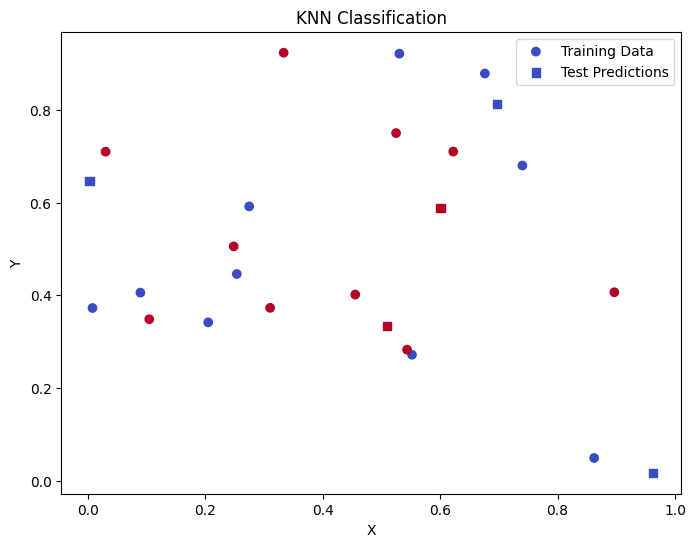

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# knn算法
def knn(X_train, y_train, X_test, k):
    distances = np.sqrt(np.sum((X_train - X_test) ** 2, axis=1))
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = y_train[nearest_indices]
    unique_labels, counts = np.unique(nearest_labels, return_counts=True)
    return unique_labels[np.argmax(counts)]

# Generate random data
X_train = np.random.rand(20, 2)
y_train = np.random.choice([0, 1], size=20)
X_test = np.random.rand(5, 2)

# Classify test samples using KNN
k = 3
predictions = []
for sample in X_test:
    predicted_label = knn(X_train, y_train, sample, k)
    predictions.append(predicted_label)
predictions = np.array(predictions)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='coolwarm', marker='s', label='Test Predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('KNN Classification')
plt.show()

## Pandas🐼

## 扩展阅读📖

- Numpy文章：[A Visual Intro to NumPy and Data Representation](https://jalammar.github.io/visual-numpy/)

- Numpy文章的中文版：[Numpy和数据展示的可视化介绍](http://www.junphy.com/wordpress/index.php/2019/10/24/visual-numpy)

- Pandas文章:[A Gentle Visual Intro to Data Analysis in Python Using Pandas](https://jalammar.github.io/gentle-visual-intro-to-data-analysis-python-pandas)

参考书：[利用Python进行数据分析（原书第2版)](https://item.jd.com/12398725.html)

github地址：[书籍源代码](https://github.com/wesm/pydata-book)

![书籍封面](./img/2023-10-27-09-00-41.png)